In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

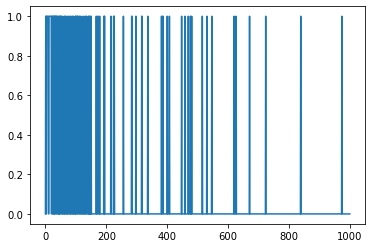

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5583 - accuracy: 0.7210 - binary_crossentropy: 0.5583 - val_loss: 0.4123 - val_accuracy: 0.8276 - val_binary_crossentropy: 0.4123
Epoch 2/20
49/49 - 0s - loss: 0.3580 - accuracy: 0.8509 - binary_crossentropy: 0.3580 - val_loss: 0.3390 - val_accuracy: 0.8554 - val_binary_crossentropy: 0.3390
Epoch 3/20
49/49 - 0s - loss: 0.3171 - accuracy: 0.8678 - binary_crossentropy: 0.3171 - val_loss: 0.3290 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3290
Epoch 4/20
49/49 - 0s - loss: 0.3033 - accuracy: 0.8750 - binary_crossentropy: 0.3033 - val_loss: 0.3262 - val_accuracy: 0.8602 - val_binary_crossentropy: 0.3262
Epoch 5/20
49/49 - 0s - loss: 0.2978 - accuracy: 0.8752 - binary_crossentropy: 0.2978 - val_loss: 0.3320 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3320
Epoch 6/20
49/49 - 0s - loss: 0.2895 - accuracy: 0.8813 - binary_crossentropy: 0.2895 - val_loss: 0.3265 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3265
Epoch 7/20
49/49 - 0s - loss

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6529 - accuracy: 0.6118 - binary_crossentropy: 0.6529 - val_loss: 0.6095 - val_accuracy: 0.7003 - val_binary_crossentropy: 0.6095
Epoch 2/20
49/49 - 0s - loss: 0.5555 - accuracy: 0.7659 - binary_crossentropy: 0.5555 - val_loss: 0.4862 - val_accuracy: 0.8150 - val_binary_crossentropy: 0.4862
Epoch 3/20
49/49 - 0s - loss: 0.4177 - accuracy: 0.8414 - binary_crossentropy: 0.4177 - val_loss: 0.3810 - val_accuracy: 0.8457 - val_binary_crossentropy: 0.3810
Epoch 4/20
49/49 - 0s - loss: 0.3510 - accuracy: 0.8598 - binary_crossentropy: 0.3510 - val_loss: 0.3493 - val_accuracy: 0.8550 - val_binary_crossentropy: 0.3493
Epoch 5/20
49/49 - 0s - loss: 0.3261 - accuracy: 0.8689 - binary_crossentropy: 0.3261 - val_loss: 0.3350 - val_accuracy: 0.8586 - val_binary_crossentropy: 0.3350
Epoch 6/20
49/49 - 0s - loss: 0.3137 - accuracy: 0.8719 - binary_crossentropy: 0.3137 - val_loss: 0.3307 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3307
Epoch 7/20
49/49 - 0s - loss

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4289 - accuracy: 0.7983 - binary_crossentropy: 0.4289 - val_loss: 0.3604 - val_accuracy: 0.8427 - val_binary_crossentropy: 0.3604
Epoch 2/20
49/49 - 0s - loss: 0.2960 - accuracy: 0.8760 - binary_crossentropy: 0.2960 - val_loss: 0.3250 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3250
Epoch 3/20
49/49 - 0s - loss: 0.2231 - accuracy: 0.9128 - binary_crossentropy: 0.2231 - val_loss: 0.3449 - val_accuracy: 0.8545 - val_binary_crossentropy: 0.3449
Epoch 4/20
49/49 - 0s - loss: 0.1097 - accuracy: 0.9652 - binary_crossentropy: 0.1097 - val_loss: 0.4293 - val_accuracy: 0.8469 - val_binary_crossentropy: 0.4293
Epoch 5/20
49/49 - 0s - loss: 0.0241 - accuracy: 0.9963 - binary_crossentropy: 0.0241 - val_loss: 0.5557 - val_accuracy: 0.8474 - val_binary_crossentropy: 0.5557
Epoch 6/20
49/49 - 0s - loss: 0.0045 - accuracy: 0.9998 - binary_crossentropy: 0.0045 - val_loss: 0.6355 - val_accuracy: 0.8510 - val_binary_crossentropy: 0.6355
Epoch 7/20
49/49 - 0s - loss

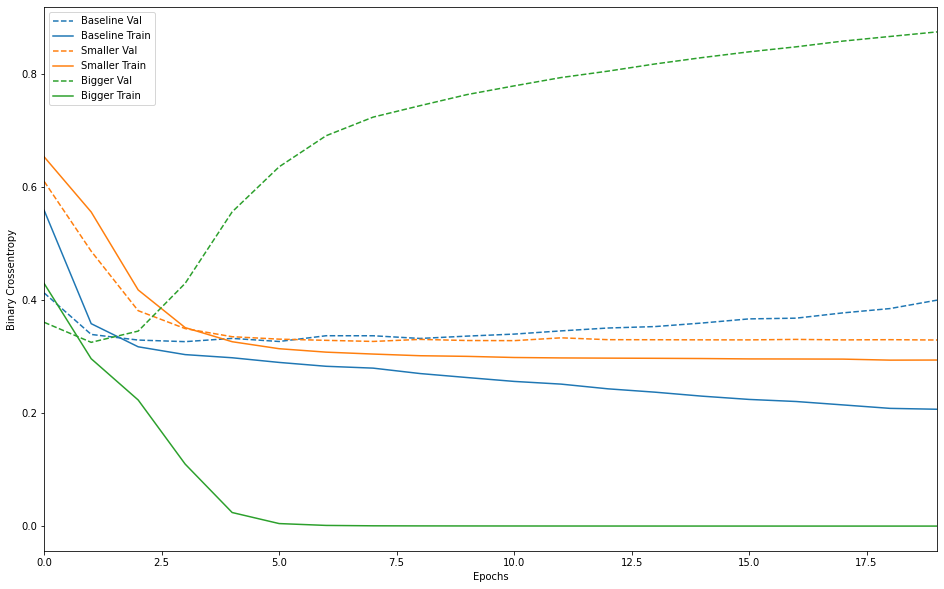

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6190 - accuracy: 0.7374 - binary_crossentropy: 0.5777 - val_loss: 0.4794 - val_accuracy: 0.8242 - val_binary_crossentropy: 0.4397
Epoch 2/20
49/49 - 0s - loss: 0.4150 - accuracy: 0.8477 - binary_crossentropy: 0.3752 - val_loss: 0.3869 - val_accuracy: 0.8551 - val_binary_crossentropy: 0.3474
Epoch 3/20
49/49 - 0s - loss: 0.3641 - accuracy: 0.8647 - binary_crossentropy: 0.3252 - val_loss: 0.3693 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.3313
Epoch 4/20
49/49 - 0s - loss: 0.3492 - accuracy: 0.8703 - binary_crossentropy: 0.3119 - val_loss: 0.3646 - val_accuracy: 0.8614 - val_binary_crossentropy: 0.3283
Epoch 5/20
49/49 - 0s - loss: 0.3450 - accuracy: 0.8722 - binary_crossentropy: 0.3094 - val_loss: 0.3683 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3335
Epoch 6/20
49/49 - 0s - loss: 0.3394 - accuracy: 0.8743 - binary_crossentropy: 0.3053 - val_loss: 0.3605 - val_accuracy: 0.8612 - val_binary_crossentropy: 0.3272
Epoch 7/20
49/49 - 0s - loss

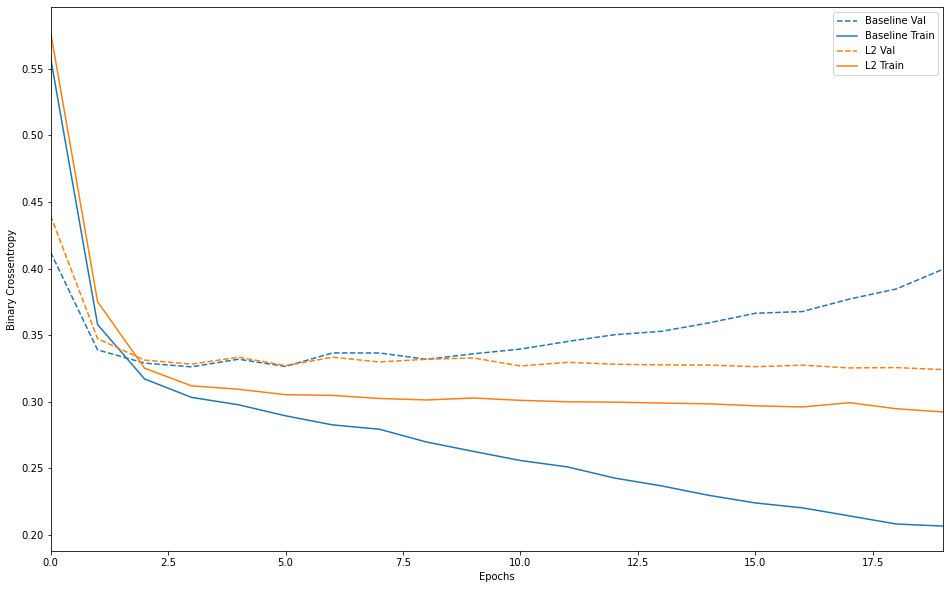

In [12]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [13]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6810 - accuracy: 0.5525 - binary_crossentropy: 0.6810 - val_loss: 0.6406 - val_accuracy: 0.7307 - val_binary_crossentropy: 0.6406
Epoch 2/20
49/49 - 0s - loss: 0.6047 - accuracy: 0.6610 - binary_crossentropy: 0.6047 - val_loss: 0.4893 - val_accuracy: 0.8156 - val_binary_crossentropy: 0.4893
Epoch 3/20
49/49 - 0s - loss: 0.4987 - accuracy: 0.7686 - binary_crossentropy: 0.4987 - val_loss: 0.3856 - val_accuracy: 0.8446 - val_binary_crossentropy: 0.3856
Epoch 4/20
49/49 - 0s - loss: 0.4351 - accuracy: 0.8130 - binary_crossentropy: 0.4351 - val_loss: 0.3531 - val_accuracy: 0.8542 - val_binary_crossentropy: 0.3531
Epoch 5/20
49/49 - 0s - loss: 0.4024 - accuracy: 0.8342 - binary_crossentropy: 0.4024 - val_loss: 0.3386 - val_accuracy: 0.8576 - val_binary_crossentropy: 0.3386
Epoch 6/20
49/49 - 0s - loss: 0.3818 - accuracy: 0.8456 - binary_crossentropy: 0.3818 - val_loss: 0.3278 - val_accuracy: 0.8602 - val_binary_crossentropy: 0.3278
Epoch 7/20
49/49 - 0s - loss

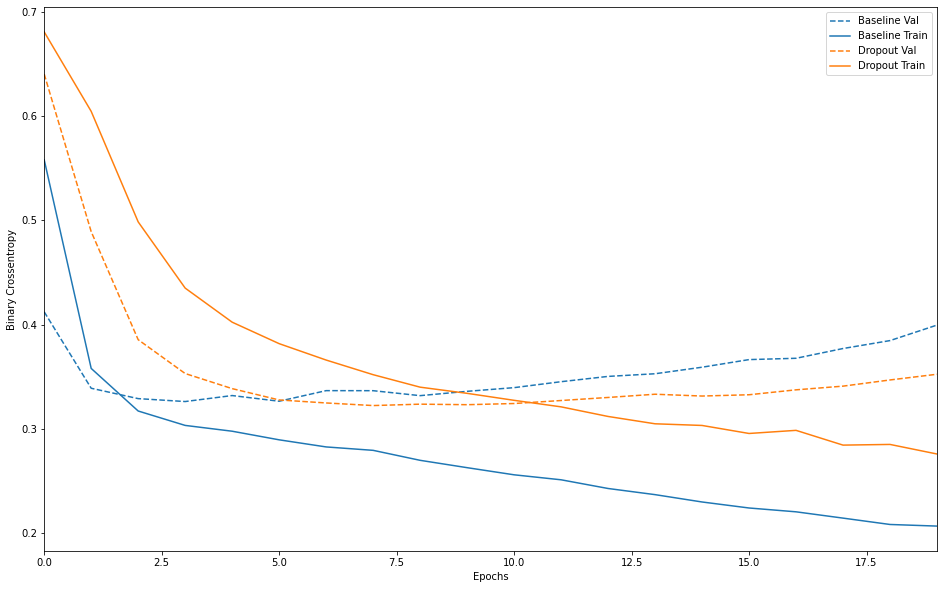

In [14]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])